<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [1]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

fonte = BeautifulSoup(open('Profissao Analista de dados M13 Exercicio original.xml',mode='r'), 'lxml')

/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [2]:
# visualize os resultados

fonte

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [3]:
# manipule os dados

estados_bruto = fonte.find_all('estado')

estados =[]

for e in estados_bruto:
  nome = e.find('nome').get_text()
  sigla = e.find('sigla').get_text()
  regiao = e.find('regiao').get_text()
  estados.append({'estado':nome,'sigla':sigla,'regiao':regiao})


In [4]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;
import csv

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

with open(NOME_ARQUIVO_DESTINO, mode='w', encoding='utf8') as arquivo:
  writer = csv.DictWriter(arquivo,delimiter=';', fieldnames=['estado','sigla','regiao'])
  writer.writeheader()
  writer.writerows(estados)



### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [5]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

fonte = pd.read_csv(NOME_ARQUIVO_FONTE)

In [6]:
# visualize os resultados

fonte.head()


,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...


In [7]:
# manipule os dados

cidades_brutos = fonte.query('Censo == 2010')
cidades_brutos = cidades_brutos[['UF', 'nome', 'PIB', 'Pop_est_2009','PIB_percapita']]

cidades_brutos


,UF,nome,PIB,Pop_est_2009,PIB_percapita
0,BAHIA,Tremedal,5.788399e+04,18433,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4.572388e+04,4000,11430.969727
2,ESPIRITO SANTO,Vitória,1.978263e+07,320156,61790.589844
3,MINAS GERAIS,Jacutinga,2.478160e+05,21424,11567.209961
4,PIAUÍ,Nazária,2.095138e+04,7895,2653.750000
...,...,...,...,...,...
5561,SANTA CATARINA,Campo Erê,1.876289e+05,9737,19269.679688
5562,PARANÁ,Planalto,1.385535e+05,13983,9908.709961
5563,SÃO PAULO,Guararapes,5.320191e+05,29639,17949.970703
5564,RIO GRANDE DO SUL,Barra do Guarita,2.198064e+04,3067,7166.819824


In [8]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'

cidades_brutos.to_csv(NOME_ARQUIVO_DESTINO, sep=';',index=False)

### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-bruto.csv` com os dados do arquivo `cidades-bruto.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [9]:
# solução do exercício 1.3

estados = pd.read_csv('estados-limpo.csv',delimiter=';')
cidades = pd.read_csv('cidades-limpo.csv',delimiter=';')

brasil = pd.merge(left=estados,right=cidades,left_on='estado',right_on='UF',how='inner')

brasil.to_csv('brasil.csv', sep=';',index=False)

---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [10]:
# solução do exercício 2.1

brasil_df = pd.read_csv('brasil.csv',delimiter=';')

brasil_df

,estado,sigla,regiao,UF,nome,PIB,Pop_est_2009,PIB_percapita
0,ACRE,AC,NORTE,ACRE,Marechal Thaumaturgo,1.091819e+05,14275,7648.470215
1,ACRE,AC,NORTE,ACRE,Senador Guiomard,2.171539e+05,19697,11024.719727
2,ACRE,AC,NORTE,ACRE,Assis Brasil,4.834730e+04,5662,8538.910156
3,ACRE,AC,NORTE,ACRE,Epitaciolândia,1.296411e+05,14224,9114.250000
4,ACRE,AC,NORTE,ACRE,Manoel Urbano,6.147873e+04,7505,8191.700195
...,...,...,...,...,...,...,...,...
3205,MINAS GERAIS,MG,SUDESTE,MINAS GERAIS,Nacip Raydan,1.600776e+04,3015,5309.370117
3206,MINAS GERAIS,MG,SUDESTE,MINAS GERAIS,Nova Ponte,4.681494e+05,12504,37439.968750
3207,MINAS GERAIS,MG,SUDESTE,MINAS GERAIS,São Gonçalo do Sapucaí,2.886858e+05,23627,12218.469727
3208,MINAS GERAIS,MG,SUDESTE,MINAS GERAIS,Barbacena,1.335420e+06,128572,10386.549805


### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [11]:
# código para responder a pergunta

maiores_cidades = brasil_df.sort_values(by=['Pop_est_2009'],  ascending=False)

maiores_cidades = list(maiores_cidades['nome'].head(10))

maiores_cidades

['Rio de Janeiro',
 'Salvador',
 'Brasília',
 'Belo Horizonte',
 'Manaus',
 'Recife',
 'Porto Alegre',
 'São Gonçalo',
 'Maceió',
 'Duque de Caxias']

 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [12]:
# código para responder a pergunta

menor_pib = brasil_df.sort_values(by=['PIB'], ascending=True)

maiores_cidades = list(menor_pib['nome'].head(5))

maiores_cidades

['São Félix do Tocantins',
 'Viçosa',
 'São Sebastião do Rio Preto',
 'Cedro do Abaeté',
 'Passabém']

 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [13]:
# código para responder a pergunta

maiores_pib = brasil_df.sort_values(by=['PIB'], ascending=False)

maiores_pib = list(maiores_pib['nome'].head(15))

maiores_pib

['Rio de Janeiro',
 'Brasília',
 'Belo Horizonte',
 'Manaus',
 'Porto Alegre',
 'Salvador',
 'Duque de Caxias',
 'Betim',
 'Recife',
 'Vitória',
 'Campos dos Goytacazes',
 'Canoas',
 'Uberlândia',
 'Contagem',
 'Joinville']

 - Qual é o PIB do estado de Santa Catarina?

In [14]:
# código para responder a pergunta

pib_santa_catarina = brasil_df.query('estado == "SANTA CATARINA"')

pib_santa_catarina

pib_santa_catarina['PIB'].agg('sum')

129806256.75195317

 - Qual é o população da região sul?

In [15]:
populacao_sul = brasil_df.query('regiao == "SUL"')
populacao_sul

populacao_sul['Pop_est_2009'].agg('sum')

17032871

 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [16]:
pib_percapito_ms = brasil_df.query('estado == "MATO GROSSO DO SUL"')
pib_percapito_ms
pib_percapito_ms['PIB_percapita'].mean()

14458.896859975644

 - Qual é a população do Brasil?

In [17]:
brasil_df['Pop_est_2009'].agg('sum')

101885500

### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

<Axes: xlabel='nome'>

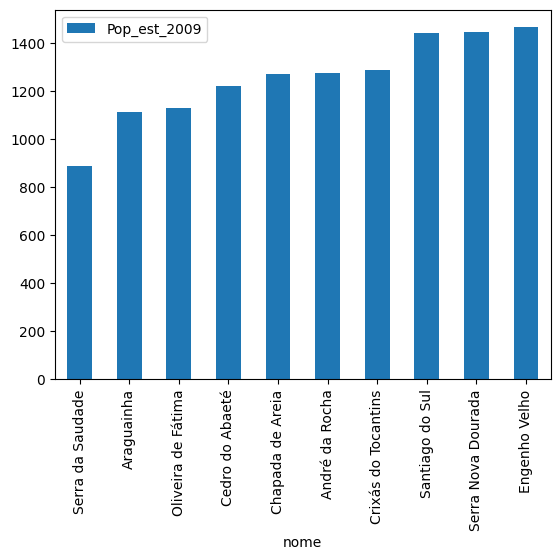

In [18]:
cidades_menos_populosas = brasil_df.sort_values(by='Pop_est_2009',ascending=True)

cidades_menos_populosas.head(10).plot.bar(x='nome',y='Pop_est_2009')

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

<Axes: ylabel='porcentagem'>

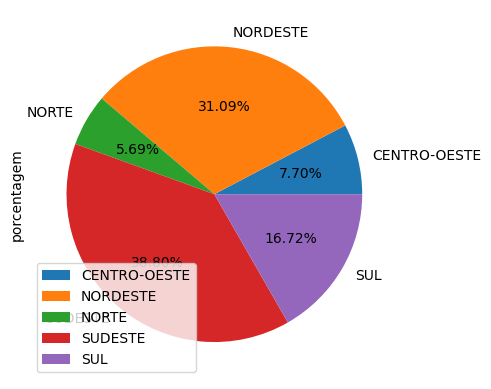

In [41]:
proporcao_brasil = brasil_df[['regiao','Pop_est_2009']].groupby(by='regiao').agg('sum')

total_populacao = proporcao_brasil['Pop_est_2009'].agg('sum')

proporcao_brasil['porcentagem'] = [ round(((x * 100) / total_populacao),2) for x in  proporcao_brasil['Pop_est_2009']]

proporcao_brasil.plot.pie(y='porcentagem', autopct='%1.2f%%')